In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import MDAnalysis as mda
import seaborn as sns

Command for centering the trajectory with gromacs:
```
gmx_mpi trjconv -s new_md_meta.tpr -f traj_comp.xtc -o prot.xtc -pbc mol -ur compact -center
```

In [1]:
GRO = "ref_nowat.gro"
XTC0 = "traj_nowat_0.xtc"

In [3]:
traj0 = mda.Universe(str(GRO), str(XTC0))

In [4]:
len(traj0.coord)

3374

In [4]:
CAL_x = []
CAL_y = []
CAL_z = []

for ts in traj0.trajectory:
    CAL = traj0.select_atoms('name CAL and resid 301').positions
    CAL_x.append(CAL[0][0])
    CAL_y.append(CAL[0][1])
    CAL_z.append(CAL[0][2])

(array([  3.,   5.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   5.,
          6.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   5.,  14.,  26.,   6.,   6.,
          4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,  28., 102.,
        207., 249., 224., 138., 111., 174., 174., 174., 212., 368., 403.,
        439., 471., 382., 348., 339., 363., 333., 348., 387., 467., 528.,
        555., 448., 462., 438., 447., 349., 170.,  72.,  42.,  18.,  11.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   7.,  22.,  12.,
          2.]),
 array([-79.200005 , -77.591606 , -75.98321  , -74.3748   , -72.7664   ,
        -71.158005 , -69.54961  , -67.9412   , -66.3328   , -64.7244   ,
        -63.116005 , -61.507603 , -59.899204 , -58.290802 , -56.682404 ,
        -55.074    , -53.465603 , -51.857204 , -50.248802 , -48.640404 ,
        -47.032    , -45.4

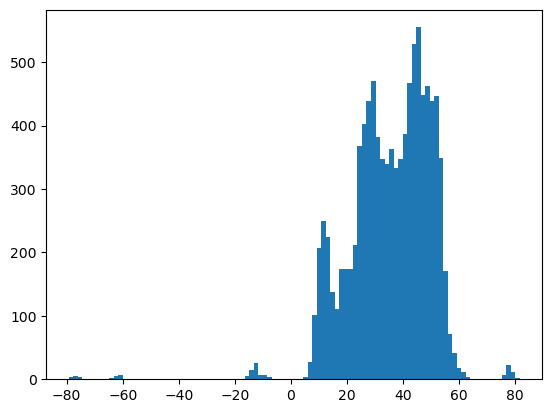

In [6]:
# devo mettere le pbc

plt.hist(CAL_x, bins=100)

In [45]:
CAL_x

[38.15,
 37.4,
 39.030003,
 38.7,
 39.2,
 39.23,
 39.500004,
 38.54,
 39.050003,
 39.070004,
 39.06,
 38.730003,
 39.770004,
 39.260002,
 38.440002,
 38.99,
 38.020004,
 38.06,
 36.980003,
 36.170002,
 36.13,
 35.68,
 36.350002,
 35.48,
 37.300003,
 37.49,
 36.550003,
 36.24,
 35.27,
 34.570004,
 35.61,
 35.49,
 34.710003,
 34.850002,
 34.0,
 33.57,
 32.83,
 33.230003,
 32.670002,
 33.02,
 32.140003,
 32.72,
 32.550003,
 33.390003,
 34.22,
 34.61,
 35.230003,
 35.08,
 35.22,
 35.230003,
 36.120003,
 36.5,
 36.320004,
 38.14,
 38.460003,
 37.920002,
 38.590004,
 39.120003,
 38.5,
 38.820004,
 39.690002,
 40.030003,
 40.53,
 39.920002,
 39.600002,
 38.43,
 39.210003,
 39.420002,
 39.480003,
 39.550003,
 40.280003,
 39.770004,
 39.280003,
 38.670002,
 38.980003,
 38.690002,
 38.440002,
 39.010002,
 39.420002,
 38.350002,
 37.77,
 38.350002,
 38.030003,
 37.82,
 37.600002,
 38.9,
 39.49,
 39.780003,
 39.860004,
 39.45,
 39.9,
 40.65,
 40.440002,
 40.72,
 39.83,
 39.99,
 39.640003,
 40.9500

In [22]:
ts = traj0.trajectory.ts
ts.positions  # returns a numpy array of positions

array([[24.29    , 64.57    , 76.96001 ],
       [23.800001, 64.08    , 76.240005],
       [23.740002, 65.270004, 77.420006],
       ...,
       [58.120003, 72.04001 , 55.39    ],
       [25.810001, 21.230001, 16.64    ],
       [51.83    , 35.71    , 12.060001]], dtype=float32)

# RMSD calculation

In [5]:
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD, rmsd

In [7]:
rec_ref = mda.Universe(str(GRO), str(XTC0))
rec_ref.trajectory[0]
#this fixes the internal index of the universe to 0, this is fundamental because you need a reference in RMSD

< Timestep 0 with unit cell dimensions [72.8375   81.3612   99.766396 90.       90.       90.      ] >

In [8]:
sel = 'name CA'
R = RMSD(traj0, rec_ref, select=sel,groupselections=['backbone']).run()

In [10]:
rmsd_df1 =  pd.DataFrame(R.results.rmsd,columns=['idx','time','CA','backbone'])
rmsd_df1

,idx,time,CA,backbone
0,0.0,0.0,0.000000,1.427837e-07
1,1.0,10.0,0.769961,7.875376e-01
2,2.0,20.0,0.742897,7.609026e-01
3,3.0,30.0,0.857001,8.691695e-01
4,4.0,40.0,0.823094,8.419055e-01
...,...,...,...,...
10113,10113.0,101130.0,10.962411,1.004052e+01
10114,10114.0,101140.0,12.456893,1.053003e+01
10115,10115.0,101150.0,12.679691,1.214813e+01
10116,10116.0,101160.0,12.681494,1.239600e+01


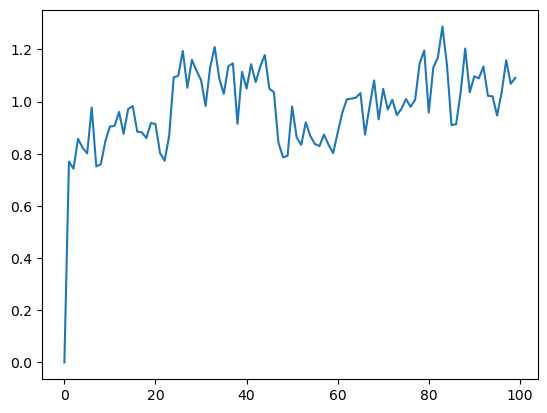

In [20]:
plt.plot(rmsd_df1["CA"][:100])

In [15]:
# Now we add the alignment
rec_aligned = mda.Universe(str(GRO),str('temp_mol_fit.xtc'))

In [16]:
rmsd_arr = [rmsd(rec_aligned.select_atoms(sel).positions, rec_ref.select_atoms(sel).positions) 
            for ts in traj0.trajectory]
rmsd_arr

[29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,
 29.52035615320444,


In [ ]:
plt.plot(rmsd_arr)